<font size=4>Video Game Sales Analysis</font>

Analysis for the online store Ice, which sells video games worldwide. 
- User and expert reviews, genres, platforms (e.g., Xbox or PlayStation), and historical game sales data are available from open sources.

<font size=4>Step 1. Importing Data</font>

In [4]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [5]:
#import data
df = pd.read_csv('games.csv')

In [6]:
df.info()
print(df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2      

<font size=4>Step 2. Data Preprocessing</font>

In [7]:
#columns names in lower
df = df.rename(columns = str.lower)

In [8]:
#Searching for missing values
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
#Name
df['name'] = df['name'].fillna('Unknown')
print("Missing values in the column 'name': ", df['name'].isna().sum())

Missing values in the column 'name':  0


NOTE: The 2 missing values in the 'name' column were filled with 'unknown' value.

In [10]:
#Year of Release
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
# fill with 0 due to an error converting non-finite values (NA or inf) to integer
print("Missing values in the column 'year_of_release': ", df['year_of_release'].isna().sum())

Missing values in the column 'year_of_release':  0


NOTE: The 269 missing values in the 'year_of_release' column were filled with 0 to avoid a 'ValueError' during the conversion to integers, as NaN values cannot be directly converted. Filling with 0 was chosen to prevent data loss.

In [11]:
#Genre
df['genre'] = df['genre'].fillna('Unknown')
print("Missing values in the column 'genre': ", df['genre'].isna().sum())

Missing values in the column 'genre':  0


In [12]:
#Critic_Score
df['critic_score'] = df['critic_score'].fillna(0).astype(int)
# fill with 0 due to an error converting non-finite values (NA or inf) to integer
print("Missing values in the column 'critic_score': ", df['critic_score'].isna().sum())

Missing values in the column 'critic_score':  0


NOTE: The 8578 missing values in the 'critic_score' column were filled with 0 to avoid a 'ValueError' during the conversion to integers, as NaN values cannot be directly converted. Filling with 0 was chosen to prevent data loss.

In [13]:
#User Score
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')  #'TBD' values are converted to NaN and then filled with 0.
df['user_score'] = df['user_score'].fillna(0) 

NOTE: This method preserves data integrity and allows for numerical analysis by handling 'TBD' and missing values in the 'user_score' column.

In [14]:
#Rating
df['rating'] = df['rating'].fillna('Unknown')
print("Missing values in the column 'rating': ", df['rating'].isna().sum())

Missing values in the column 'rating':  0


NOTE: Since 'rating' is a categorical variable, filling with 'Unknown' preserves the categorical of the column (making it easier to analyze and interpret).

In [15]:
#Creating 'total_sales' column
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [16]:
#Checking data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int32  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.4+ MB


<font size=4>Step 3. Data Analysis</font> 

- How many games were released in different years?

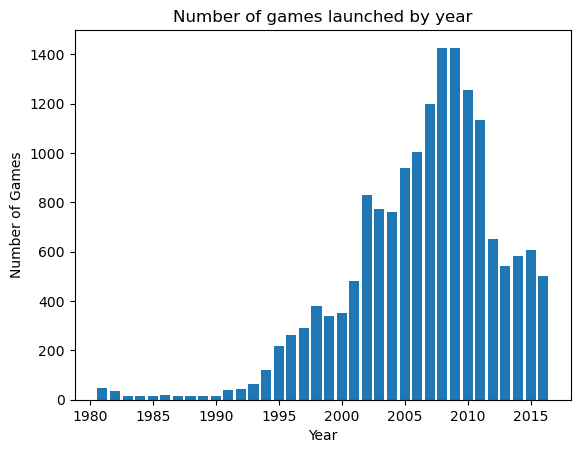

In [17]:
games_by_year = df[df['year_of_release']!= 0].groupby('year_of_release')['name'].count().reset_index()
games_by_year = games_by_year[1:]

plt.bar(games_by_year['year_of_release'], games_by_year['name'])
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of games launched by year')
plt.show()

- Observe how sales vary across platforms. 

1. Select the platforms with the highest total sales and construct a distribution based on each year's data. 

   platform  na_sales  eu_sales  jp_sales  other_sales  total_sales
16      PS2    583.84    339.29    139.20       193.44      1255.77
28     X360    602.47    270.76     12.43        85.76       971.42
17      PS3    393.49    330.29     80.19       135.68       939.65
26      Wii    496.90    262.21     69.33        79.07       907.51
4        DS    382.40    188.89    175.57        59.26       806.12


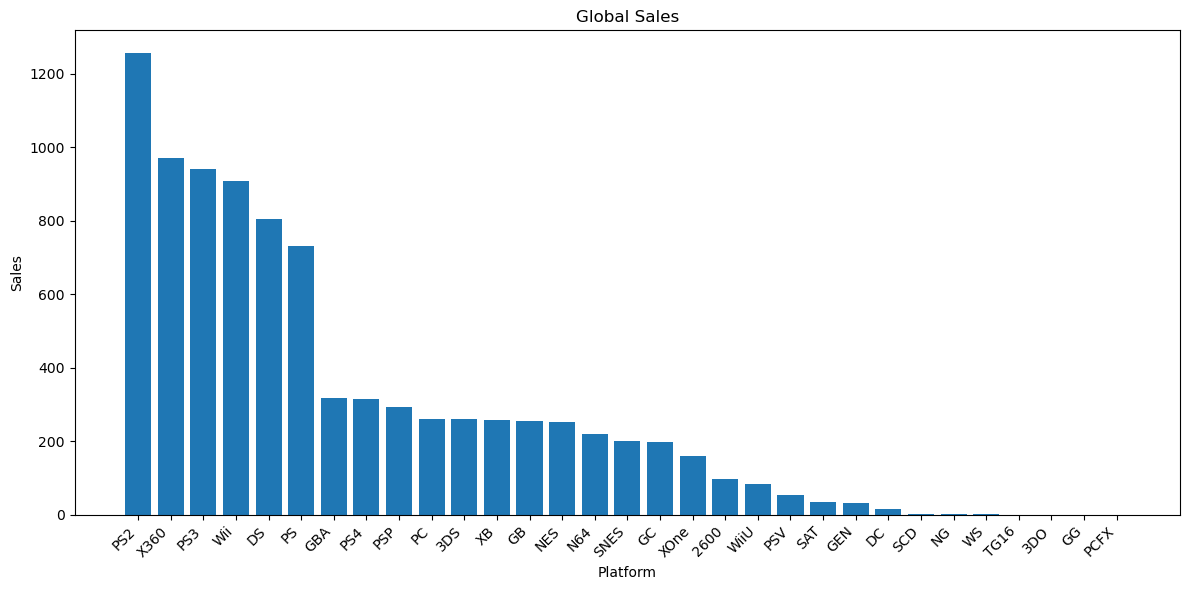

In [18]:
#diference in sales by platforms in different parts of the world
platform_sales_na = df.groupby('platform')['na_sales'].sum().reset_index() #sum of sales in North America by platform
platform_sales_eu = df.groupby('platform')['eu_sales'].sum().reset_index()
platform_sales_jp = df.groupby('platform')['jp_sales'].sum().reset_index()
platform_sales_other = df.groupby('platform')['other_sales'].sum().reset_index()

#merge the sales from different regions
df_filtered_sales = platform_sales_na.merge(platform_sales_eu, on = 'platform', how = 'inner')
df_filtered_sales = df_filtered_sales.merge(platform_sales_jp, on = 'platform', how = 'inner')
df_filtered_sales = df_filtered_sales.merge(platform_sales_other, on = 'platform', how = 'inner')

#calculate total sales
df_filtered_sales['total_sales'] = df_filtered_sales['na_sales'] + df_filtered_sales['eu_sales'] + df_filtered_sales['jp_sales'] + df_filtered_sales['other_sales']
df_filtered_sales = df_filtered_sales.sort_values(by = 'total_sales', ascending = False) #sort values in descending order
print(df_filtered_sales.head(5))
#The top 5 global platforms according to sales were the PS2, X360, PS3, Wii and DS.

plt.figure(figsize = (12, 6))
plt.bar(df_filtered_sales['platform'], df_filtered_sales['total_sales'])
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.title('Global Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

2. Look for platforms that used to be popular but are now losing sales. 
3. How long does it typically take for a new platform to appear and an old one to disappear?

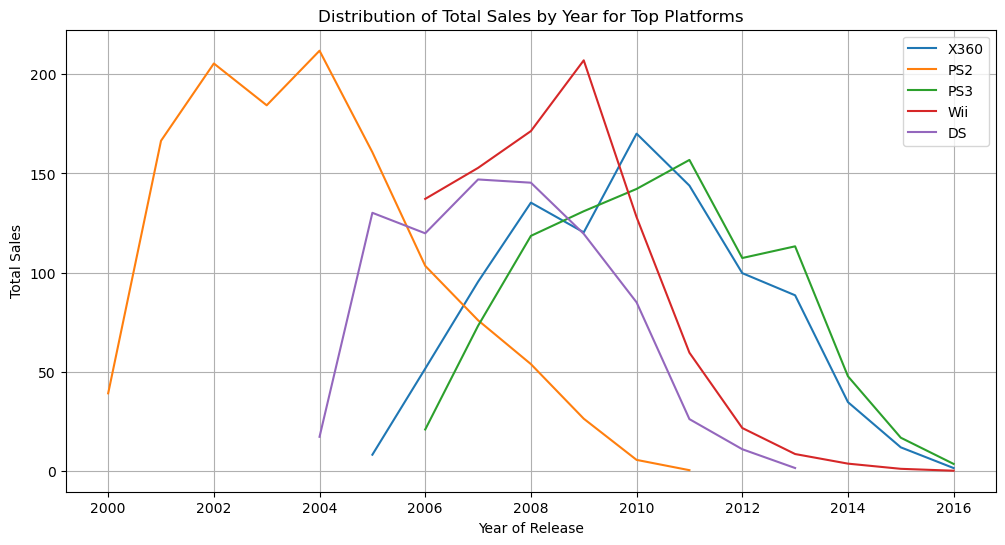

In [19]:
#distribution of top sales by year
x360_sales = df[df['platform'] == 'X360']
x360_sales_by_year = x360_sales.groupby('year_of_release')['total_sales'].sum().reset_index()
x360_sales_by_year = x360_sales_by_year[1:] #exclude missing values from 'year_of_release'

ps2_sales = df[df['platform'] == 'PS2']
ps2_sales_by_year = ps2_sales.groupby('year_of_release')['total_sales'].sum().reset_index()
ps2_sales_by_year = ps2_sales_by_year[1:]

ps3_sales = df[df['platform'] == 'PS3']
ps3_sales_by_year = ps3_sales.groupby('year_of_release')['total_sales'].sum().reset_index()
ps3_sales_by_year = ps3_sales_by_year[1:]

wii_sales = df[df['platform'] == 'Wii']
wii_sales_by_year = wii_sales.groupby('year_of_release')['total_sales'].sum().reset_index()
wii_sales_by_year = wii_sales_by_year[1:]

ds_sales = df[df['platform'] == 'DS']
ds_sales_by_year = ds_sales.groupby('year_of_release')['total_sales'].sum().reset_index()
ds_sales_by_year = ds_sales_by_year[2:] # there is sale registered in 1985 for the DS, which is an error, the reason to start from index 2

plt.figure(figsize = (12, 6))
plt.plot(x360_sales_by_year['year_of_release'], x360_sales_by_year['total_sales'], label = 'X360')
plt.plot(ps2_sales_by_year['year_of_release'], ps2_sales_by_year['total_sales'], label = 'PS2')
plt.plot(ps3_sales_by_year['year_of_release'], ps3_sales_by_year['total_sales'], label = 'PS3')
plt.plot(wii_sales_by_year['year_of_release'], wii_sales_by_year['total_sales'], label = 'Wii')
plt.plot(ds_sales_by_year['year_of_release'], ds_sales_by_year['total_sales'], label = 'DS')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.title('Distribution of Total Sales by Year for Top Platforms')
plt.legend()
plt.grid(True)
plt.show()

The lifespan of a gaming platform varies, but the analysis suggests that it typically takes around 10 years for a platform to rise and then decline. The Playstation 2, which was introduced in 2000, reached its peak sales around 2004-2005 and had largely declined in popularity by 2010. The Xbox 360 had a similar trajectory with a lifespan of 11 years.

Notable platforms that were once popular but have experienced a decline in recent years were the Playstation 2 (PS2), Nintendo DS (DS) and Wii. These platforms were in top at its moment, but their sales have diminished as newer consoles have emerged.

- Model for 2017

In [20]:
filtered_df = df[(df['year_of_release'] >= 2007) & (df['year_of_release'] <= 2016)]
filtered_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,0,0.0,Unknown,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73


Data from 2007 onwards captures the trends and cover the lifespans of all the top plataforms of the gaming market that are most likely to influence sales in 2017. The dataset only goes up to 2016, making it difficult to predict 2017 sales with high accuracy.

- Which platforms are leading in sales? Which ones are growing and which ones are declining?

The Playstation 2 was a global sales leader for a considerable period, with high initial sales. Its decline was likely due to the introduction of newer console generations. While the Xbox 360 had a long lifespan (around 11 years) and maintained significant global sales.

- Box Plot for the global sales of all games

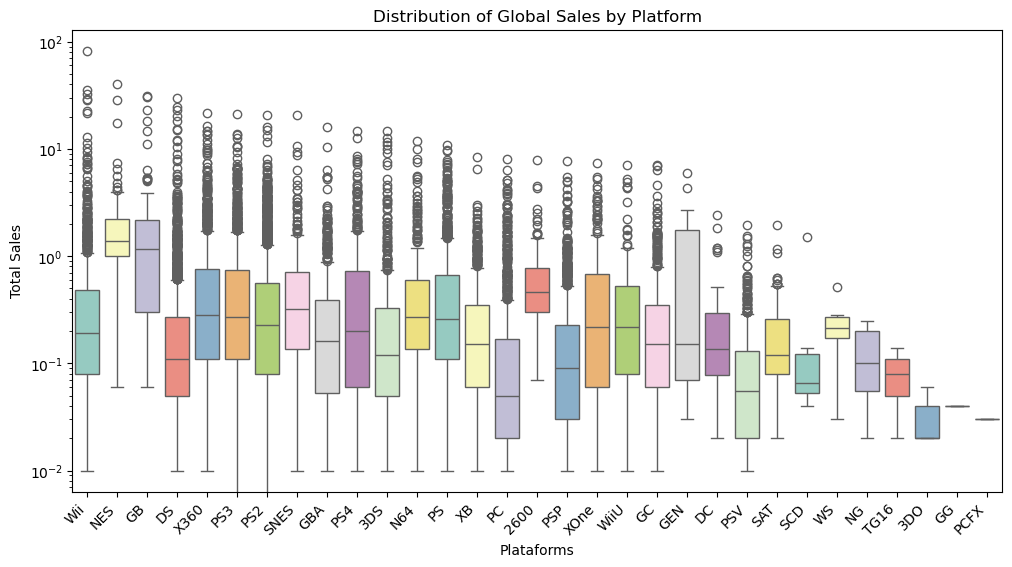

platform
GB      2.606735
NES     2.561735
GEN     1.061034
SNES    0.836987
PS4     0.801378
X360    0.769746
2600    0.729173
PS3     0.705973
Wii     0.687508
N64     0.685517
XOne    0.645020
PS      0.610576
PS2     0.581106
WiiU    0.559116
3DS     0.498077
GBA     0.386679
DS      0.374765
GC      0.357788
XB      0.312791
SCD     0.310000
DC      0.306731
PC      0.266448
PSP     0.243218
WS      0.236667
SAT     0.194162
PSV     0.125744
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: total_sales, dtype: float64


In [38]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'platform', 
            y = 'total_sales', 
            data = df,
            hue='platform', 
            palette='Set3'
            )
plt.xticks(rotation = 45, ha = 'right') #rotates x-labels
plt.title('Distribution of Global Sales by Platform')
plt.xlabel('Plataforms')
plt.ylabel('Total Sales')
plt.yscale('log') #using a logarithmic scale for the y-axis can help visualize the differences more clearly
plt.show()

average_sales_by_platform = df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print(average_sales_by_platform)

Are the differences in sales significant? What about the average sales across various platforms?
From the box plot and the average sales calculation, you can infer that:

There is significant variability in sales across platforms. Platforms like Gameboy, NES, and  Genesis have higher average sales compared to other platforms like Playstation Vita and Saturn, that have relatively lower average sales.

- How user and professional reviews affect sales on a popular platform?

(create a scatter plot and calculate the ratio of reviews to sales)

                                            name  user_score  total_sales
6                          New Super Mario Bros.         8.5        29.80
10                                    Nintendogs         0.0        24.67
11                                 Mario Kart DS         8.6        23.21
19  Brain Age: Train Your Brain in Minutes a Day         7.9        20.14
20                 Pokemon Diamond/Pokemon Pearl         0.0        18.24
26   Brain Age 2: More Training in Minutes a Day         7.1        15.28
27                   Pokemon Black/Pokemon White         0.0        15.13
43                   Animal Crossing: Wild World         8.7        12.14
46          Pokemon HeartGold/Pokemon SoulSilver         0.0        11.77
59                                Super Mario 64         0.0        10.30



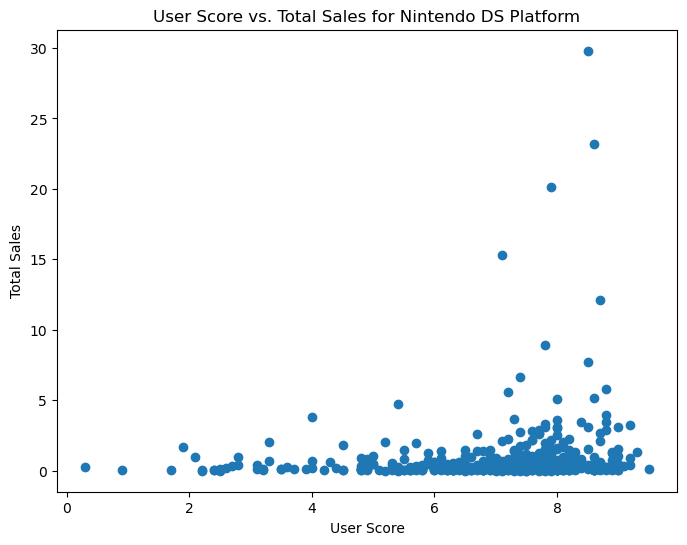

Correlation between User Score and Total Sales: 0.187829559862906


In [22]:
#Nitendo DS
ds_df = df[df['platform'] == 'DS']
ds_user_score = ds_df[['name','user_score', 'total_sales']]
print(ds_user_score.head(10))
print()

ds_user_score = ds_df[ds_df['user_score'] != 0] #filter out rows with user_score equal to 0

#scatter plot for user score vs. total sales (excluding critic_score = 0)
plt.figure(figsize = (8, 6))
plt.scatter(ds_user_score['user_score'], ds_user_score['total_sales'])
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('User Score vs. Total Sales for Nintendo DS Platform')
plt.show()

#calculate correlation between user score and total sales (excluding critic_score = 0)
user_score_correlation = ds_df['user_score'].corr(ds_df['total_sales'])
print(f"Correlation between User Score and Total Sales: {user_score_correlation}")

                                            name  critic_score  total_sales
6                          New Super Mario Bros.            89        29.80
10                                    Nintendogs             0        24.67
11                                 Mario Kart DS            91        23.21
19  Brain Age: Train Your Brain in Minutes a Day            77        20.14
20                 Pokemon Diamond/Pokemon Pearl             0        18.24
26   Brain Age 2: More Training in Minutes a Day            77        15.28
27                   Pokemon Black/Pokemon White             0        15.13
43                   Animal Crossing: Wild World            86        12.14
46          Pokemon HeartGold/Pokemon SoulSilver             0        11.77
59                                Super Mario 64             0        10.30



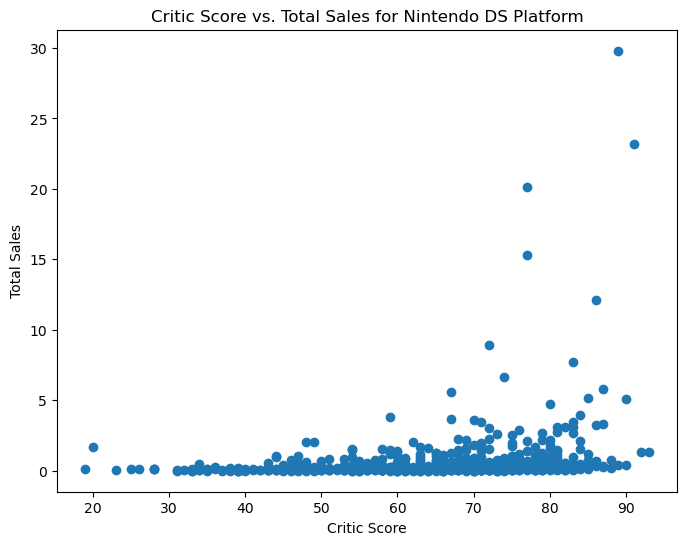

Correlation between Critic Score and Total Sales: 0.15908732465426667


In [23]:
ds_critic_score = ds_df[['name','critic_score', 'total_sales']]
print(ds_critic_score.head(10))
print()

ds_critic_score = ds_critic_score[ds_critic_score['critic_score'] != 0]#filter out rows with critic_score equal to 0

#scatter plot for critic score vs. total sales (excluding critic_score = 0)
plt.figure(figsize=(8, 6))
plt.scatter(ds_critic_score['critic_score'], ds_critic_score['total_sales'])
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.title('Critic Score vs. Total Sales for Nintendo DS Platform')
plt.show()

#calculate correlation between critic score and total sales (excluding critic_score = 0)
critic_score_correlation = ds_df['critic_score'].corr(ds_df['total_sales'])
print(f"Correlation between Critic Score and Total Sales: {critic_score_correlation}")

The analysis of the Nintendo DS platform reveals a weak, but positive correlation between 'user_score' and 'total_sales'. In the case of 'critic_score', the correlation with 'total_sales' is moderate and positive. Although these correlations suggest some influence of reviews on sales, it's important to consider that may be affected by other factors. 

NOTE: Excluding games without score is recommended for a more accurate analysis (but could affect total sales).

- Compare the sales of the same games on other platforms

In [24]:
games_in_other_platforms = df['name'].unique()

platforms_games = []

for game in games_in_other_platforms:
    game_df = df[df['name'] == game] #filter the dataframe for the current game
    if len(game_df['platform'].unique()) > 1:
       platforms_games.append(game_df[['name', 'platform', 'total_sales']])

In [25]:
platforms_games_df = pd.concat(platforms_games) #convert platforms_games to dataframe
selecting_game = platforms_games_df[platforms_games_df['name'] == 'Grand Theft Auto V'] #filter for a game in specific

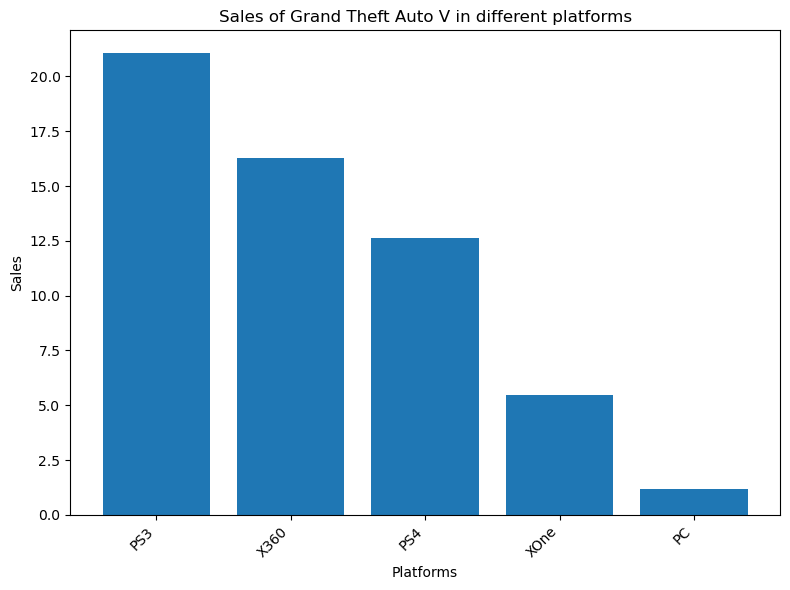

In [26]:
plt.figure(figsize = (8, 6))
plt.bar(selecting_game['platform'], selecting_game['total_sales'])
plt.xlabel('Platforms')
plt.ylabel('Sales')
plt.title(f"Sales of {selecting_game['name'].iloc[0]} in different platforms") #accessing the game name
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout() #to prevent labels from overlapping
plt.show()

 - Distribution of games by genre

           genre  total_sales
0         Action      1744.17
1      Adventure       237.59
2       Fighting       447.53
3           Misc       802.51
4       Platform       827.77
5         Puzzle       242.57
6         Racing       728.67
7   Role-Playing       934.56
8        Shooter      1052.45
9     Simulation       389.97
10        Sports      1331.27
11      Strategy       174.23
12       Unknown         2.42


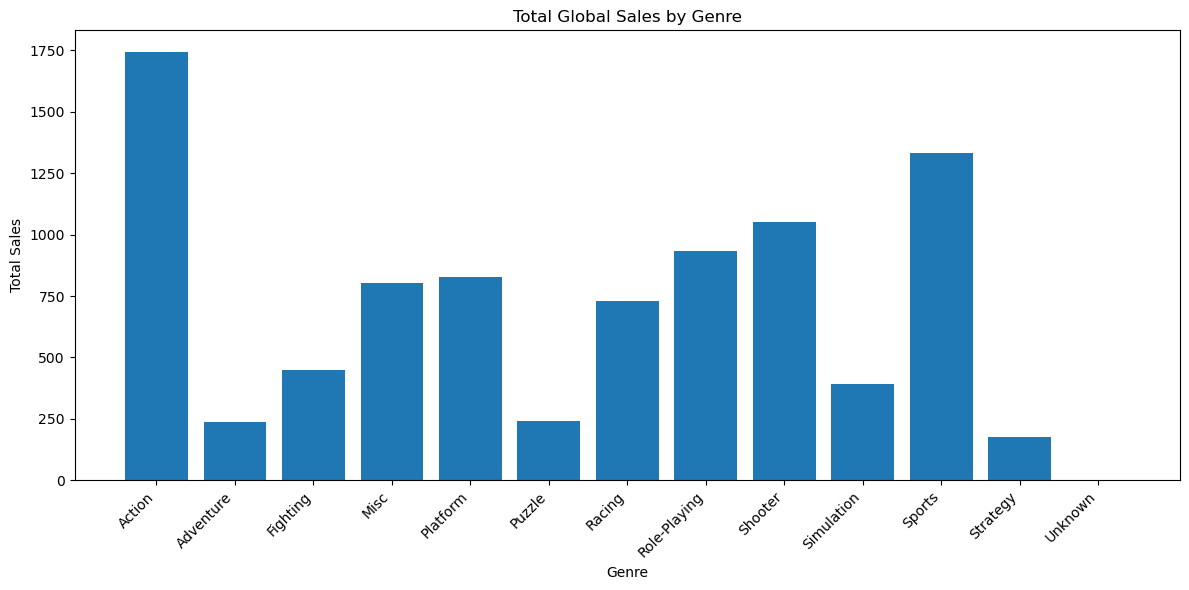

In [27]:
sales_by_genre = df.groupby('genre')['total_sales'].sum().reset_index()
print(sales_by_genre)
plt.figure(figsize = (12, 6))
plt.bar(sales_by_genre['genre'], sales_by_genre['total_sales'])
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Total Global Sales by Genre')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

What can you say about the most profitable genres? 

Action, Shooter, and Sports are the most profitable genres (this results in higher sales and wider popularity).

Can you generalize about genres with high and low sales?

Genres like Action, Shooter, and Sports are generally the most profitable, driven by their popularity and attraction to play. While genres like Adventure, Strategy, Puzzle, and Role-Playing tend to have lower sales (often targeting to little audience or requiring specific play styles that are not that popular).

<font size=4>Step 4. Create a user profile for each region</font>

For each region (NA, EU, JP), determine:

1. The top five platforms. Describe the variations in their market share from region to region.
2. The top five genres. Explain the differences.
3. Whether ESRB ratings affect sales in individual regions.

In [28]:
#Creating separate dataframes for every region
na_region = df.drop(columns = ['eu_sales', 'jp_sales', 'other_sales'])
eu_region = df.drop(columns = ['na_sales', 'jp_sales', 'other_sales'])
jp_region = df.drop(columns = ['eu_sales', 'na_sales', 'other_sales'])

In [29]:
# Top 5 platforms for the NA, EU and JP regions
na_top_platforms = na_region.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5)
print("Top 5 platforms in NA:", na_top_platforms), print()
eu_top_platforms = eu_region.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5)
print("Top 5 platforms in EU:", eu_top_platforms), print()
jp_top_platforms = jp_region.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5)
print("Top 5 platforms in JP:", jp_top_platforms), print()

# Market share variations
# determine the 'total_sales' for each 'platform' within a region, and then dividing it by the 'total_sales' for that region.
# in order to provide the proportion that each platform has
na_market = na_region.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5) / na_region['na_sales'].sum()
eu_market = eu_region.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5) / eu_region['eu_sales'].sum()
jp_market = jp_region.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5) / jp_region['jp_sales'].sum()

print("\nMarket variations:"), print()
print("North America:", na_market), print()
print("Europe:", eu_market), print()
print("Japan:", jp_market), print()

Top 5 platforms in NA: platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 platforms in EU: platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 platforms in JP: platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


Market variations:

North America: platform
X360    0.136852
PS2     0.132620
Wii     0.112872
PS3     0.089382
DS      0.086863
Name: na_sales, dtype: float64

Europe: platform
PS2     0.139932
PS3     0.136221
X360    0.111669
Wii     0.108143
PS      0.088099
Name: eu_sales, dtype: float64

Japan: platform
DS      0.135328
PS      0.107772
PS2     0.107294
SNES    0.089836
3DS     0.077595
Name: jp_sales, dtype: float64



(None, None)

Some popular platforms like the X360, PS3, and Wii are present in the top 5 for both North America and Europe, indicating a degree of global appeal and popularity between regions. Japan's market, for instance, exhibits a stronger preference for the DS and PS platforms.

In North America, the top 5 platforms capture a big percentage of the market, underscoring their dominance. Slightly lower percentages are observed in Europe and Japan.

In [30]:
#Top 5 genres for the NA, EU and JP regions
na_genres = na_region.groupby('genre')['na_sales'].sum().sort_values(ascending = False)
eu_genres = eu_region.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)
jp_genres = jp_region.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)
print("\nTop 5 Genres for every region:"), print()
print("North America:", na_genres), print()
print("Europe:", eu_genres), print()
print("Japan:", jp_genres), print()


Top 5 Genres for every region:

North America: genre
Action          879.01
Sports          684.43
Shooter         592.24
Platform        445.50
Misc            407.27
Racing          359.35
Role-Playing    330.81
Fighting        223.36
Simulation      181.92
Puzzle          122.87
Adventure       105.26
Strategy         68.55
Unknown           1.78
Name: na_sales, dtype: float64

Europe: genre
Action          519.13
Sports          376.79
Shooter         317.34
Racing          236.51
Misc            212.74
Platform        200.35
Role-Playing    188.71
Simulation      113.52
Fighting        100.33
Adventure        63.54
Puzzle           50.01
Strategy         45.17
Unknown           0.53
Name: eu_sales, dtype: float64

Japan: genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Fighting         87.48
Simulation       63.80
Puzzle           57.31
Racing           56.71
Adventure        52.30
Strategy         49.66
Shoo

(None, None)

North America and Europe users demonstrate similar preference with Action, Sports, and Shooter games dominating the sales.
Japan deviates significantly in Role-Playing games (following with Action games as second).

In [31]:
#ESRB rating sales in different regions
na_ratings = na_region.groupby('rating')['na_sales'].sum().sort_values(ascending = False)
eu_ratings = eu_region.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)
jp_ratings = jp_region.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)
print("\nRating variations:"), print()
print("North America:", na_ratings), print()
print("Europe:", eu_ratings), print()
print("Japan:", jp_ratings), print()


Rating variations:

North America: rating
E          1292.99
Unknown    1242.46
T           759.75
M           748.48
E10+        353.32
K-A           2.56
EC            1.53
AO            1.26
RP            0.00
Name: na_sales, dtype: float64

Europe: rating
E          710.25
Unknown    613.83
M          483.97
T          427.03
E10+       188.52
AO           0.61
K-A          0.27
EC           0.11
RP           0.08
Name: eu_sales, dtype: float64

Japan: rating
Unknown    841.96
E          198.11
T          151.40
M           64.24
E10+        40.20
K-A          1.46
AO           0.00
EC           0.00
RP           0.00
Name: jp_sales, dtype: float64



(None, None)

The analysis of ESRB ratings reveals distinct preferences across regions. In North America and Europe, "E" (Everyone) and "M" (Mature) rated games dominate sales. While Japan exhibits a stronger preference for "E" and "T" (Teen) rated games (suggesting a greater focus on all-ages entertainment and lower demand for mature-rated titles compared to North America and Europe.

<font size=4>Step 5. Hypothesis Testing</font>

In [32]:
# Hypothesis Testing
# Hypothesis 1: The average user ratings for the Xbox One and PC platforms are the same.

# H0: xbox_one_ratings = pc_ratings
# H1: xbox_one_ratings != pc_ratings

alpha = 0.05 #there is a 5% probability of rejecting the null hypothesis

xbox_one_ratings = df[df['platform'] == 'XOne']['user_score'] # Get user ratings for Xbox One and PC
pc_ratings = df[df['platform'] == 'PC']['user_score']

# Hypothesis on the equality of the means of two populations
results = st.ttest_ind(xbox_one_ratings, pc_ratings)

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

valor p: 0.0005833414469972175
We reject the null hypothesis


In [33]:
# Hypothesis Testing
# Hypothesis 2: The Average user ratings for Action and Sports genres are different.

# H0: action_ratings = sports_ratings
# H1: action_ratings != sports_ratings

alpha = 0.05 #there is a 5% probability of rejecting the null hypothesis

action_ratings = df[df['genre'] == 'Action']['user_score']
sports_ratings = df[df['genre'] == 'Sports']['user_score']

# Hypothesis on the equality of the means of two populations
results = st.ttest_ind(action_ratings, sports_ratings)

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

valor p: 1.1944013786844029e-08
We reject the null hypothesis


<font size=4>Step 6. General Conclusion</font>

In conclusion, it was analized at video game sales data to find trends and patterns. Some key things we found were that certain platforms like the PS2, Xbox 360, PS3, Wii, and DS were the most popular, and genres like Action, Sports, and Shooter stood out the most. On the other hand, the platforms tend to go through a life cycle (between 8 and 11 years in general) where new ones eventually replace the older ones.

Some hypotheses were tested and it was found that user ratings for Xbox One and PC games were statistically different. However, for the Action and Sports genres, the difference in ratings wasn’t significant.

Overall, these findings helped to understand better what influences video game sales and could help predict future trends (although, any predictions should be made carefully).